In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
X = np.array(range(50, 500))

In [3]:
Y = np.array([np.random.randint(low=v-50, high=v)*2 for v in X])

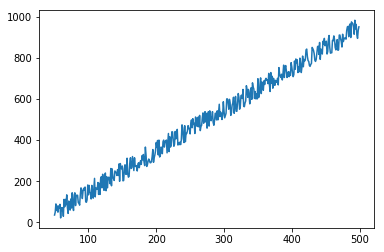

In [4]:
plt.plot(X, Y)

In [5]:
class Hypothesis:
    def __init__(self, w0, w1):
        self.w0 = w0
        self.w1 = w1
    
    def __call__(self, X):
        return X*self.w1 + self.w0

In [6]:
h = Hypothesis(-100, 1.5)

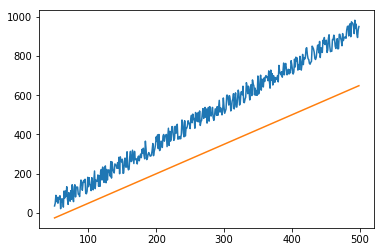

In [7]:
plt.plot(X, Y)
plt.plot(X, h(X))

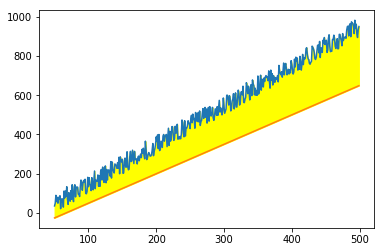

In [8]:
plt.plot(X, Y)
plt.plot(X, h(X))
plt.fill_between(X, h(X), Y,color='yellow')

In [9]:
def mse(X, Y, H):
    return 1/(2*X.shape[0]) * np.sum((H(X) - Y)**2, axis=0)

In [10]:
mse(X, Y, h)

19570.290277777778

In [11]:
def d_mse_w0(X, Y, H):
    return 1/X.shape[0] * np.sum((H(X) - Y), axis=0)

In [12]:
def d_mse_w1(X, Y, H):
    return 1/X.shape[0] * np.sum((H(X) - Y)*X, axis=0)

In [13]:
def SGD(alpha, X, Y, H, mse, d_mse_w0, d_mse_w1):
    loss = np.array([mse(X, Y, H)])
    for i in range(1000):
        w0 = H.w0 - alpha*d_mse_w0(X, Y, H)
        w1 = H.w1 - alpha*d_mse_w1(X, Y, H)
        
        H.w0 = w0
        H.w1 = w1
        loss = np.append(loss, [mse(X, Y, H)], axis=0)
    return loss

In [14]:
loss = SGD(0.0000001, X, Y, h, mse, d_mse_w0, d_mse_w1)

In [15]:
loss

array([19570.29027778, 19222.57583159, 18881.24547133, ...,
         631.73300652,   631.73299591,   631.73298535])

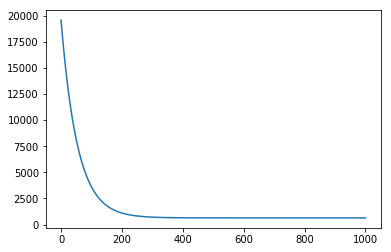

In [16]:
plt.plot(loss)

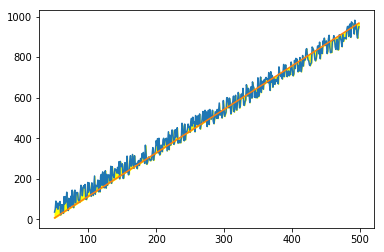

In [17]:
plt.plot(X, Y)
plt.plot(X, h(X))
plt.fill_between(X, h(X), Y,color='yellow')